# Add wikipedia articles to prompts

In [ ]:
%pip install wikipedia

In [ ]:
import wikipedia

# Set the language to English
wikipedia.set_lang("en")

name_of_cybernetician = "Gordon Pask"
# Get the full page
full_page = wikipedia.page(name_of_cybernetician)


# Get the content
content = full_page.content

# Sections to omit
omit_sections = ["See also", "External links", "References"]

# Split the content into sections
sections = content.split("== ")

# Filter out the sections to omit
filtered_sections = [section for section in sections if not any(omit_section in section for omit_section in omit_sections)]

# Join the sections back together
filtered_content = "== ".join(filtered_sections)


# save filtered_content in file with name_of_cybernetician
with open(f"wiki_articles/{name_of_cybernetician}.txt", "w") as f:
    f.write(filtered_content)


In [ ]:
import wikipedia
import os

def fetch_and_save_wiki_article(name, lang="en", omit_sections=None):
    """
    Fetch the wikipedia article of a given name and save it to a file after omitting specified sections.

    :param name: Name of the individual or topic to fetch the article for
    :param lang: Language of the wikipedia to use, default is 'en' (English)
    :param omit_sections: List of sections to omit from the article, default is None
    :return: None
    """
    
    if omit_sections is None:
        omit_sections = ["See also", "External links", "References"]

    # Set the language
    wikipedia.set_lang(lang)
    
    try:
        # Get the full page
        full_page = wikipedia.page(name)
        
        # Get the content
        content = full_page.content

        # Split the content into sections
        sections = content.split("== ")

        # Filter out the sections to omit
        filtered_sections = [section for section in sections if not any(omit_section in section for omit_section in omit_sections)]

        # Join the sections back together
        filtered_content = "== ".join(filtered_sections)

        # Create a directory to store wiki articles if it doesn't exist
        if not os.path.exists("wiki_articles"):
            os.makedirs("wiki_articles")
        
        # Save filtered_content in file with name
        with open(f"wiki_articles/{name}.txt", "w") as f:
            f.write(filtered_content)
        
        print(f"The article has been saved to 'wiki_articles/{name}.txt'")
    
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"The name '{name}' refers to multiple articles: {e.options}")
    except wikipedia.exceptions.PageError:
        print(f"No Wikipedia page found for '{name}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
fetch_and_save_wiki_article("Gordon Pask")


In [ ]:
names = [
    "Walter Cannon", 
    "Norbert Wiener", 
    "Warren Weaver", 
    "Warren S. McCulloch", 
    "W. Ross Ashby", 
    "John von Neumann", 
    "Gregory Bateson", 
    "Heinz von Foerster", 
    "Hsue-Shen Tsien", 
    "Claude Shannon", 
    "Ernst von Glasersfeld", 
    "Russell Ackoff", 
    "Stafford Beer", 
    "Gordon Pask", 
    "Humberto Maturana"
]


for name in names: 
    fetch_and_save_wiki_article(name)

In [ ]:
import json 
# Load the existing JSON data
with open('system_prompts.json', 'r') as file:
    data = json.load(file)

# Get the data associated with "pask"
pask_data = data['personae']['pask']

# Create a new dictionary to store the updated data
new_personae = {}

# Loop through each name in the list
for name in names:
    # Create a new attribute for each name, where the value is a copy of the pask data 
    # but with "Gordon Pask" replaced with the current name
    new_personae[name.lower().replace(" ", "_")] = {
        key: value.replace("Gordon Pask", name) for key, value in pask_data.items()
    }

# Update the 'personae' attribute in the JSON data with the new dictionary
data['personae'] = new_personae


In [ ]:
# Save the updated JSON data back to the file
with open('system_prompts.json', 'w') as file:
    json.dump(data, file, indent=4)

# Get Images

In [ ]:
from wikipedia import WikipediaPage
from urllib.request import urlretrieve
import os

def fetch_and_save_wiki_image(name, lang="en"):
    """
    Fetch the main image from the Wikipedia page of a given name and save it to a file.

    :param name: Name of the individual or topic to fetch the image for
    :param lang: Language of the wikipedia to use, default is 'en' (English)
    :return: None
    """
    try:
        # Set the language
        wikipedia.set_lang(lang)
        
        # Get the full page
        page = WikipediaPage(title=name)

        # Get the main image
        images = page.images
        main_image_url = next((url for url in images if 'jpg' in url), None)

        if main_image_url:
            # Create a directory to store wiki images if it doesn't exist
            if not os.path.exists("wiki_images"):
                os.makedirs("wiki_images")
            
            # Save the main image to a file
            image_name = name.replace(" ", "_") + ".jpg"
            urlretrieve(main_image_url, os.path.join("wiki_images", image_name))
            
            print(f"The image has been saved to 'wiki_images/{image_name}'")
        else:
            print(f"No jpg image found for '{name}'")

    except wikipedia.exceptions.DisambiguationError as e:
        print(f"The name '{name}' refers to multiple articles: {e.options}")
    except wikipedia.exceptions.PageError:
        print(f"No Wikipedia page found for '{name}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
fetch_and_save_wiki_image("Gordon Pask")


The image has been saved to 'wiki_images/Gordon_Pask.gif'


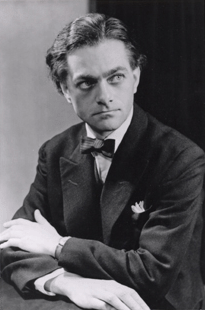

The image has been saved to 'wiki_images/Gordon_Pask.gif'


In [18]:
from bs4 import BeautifulSoup
import requests
import os
from urllib.parse import urljoin
from IPython.display import Image
from IPython.display import display

from PIL import Image as PILImage
from io import BytesIO


def fetch_and_save_wiki_image(name, lang="en"):
    """
    Fetch the main image from the Wikipedia page of a given name and save it to a file.

    :param name: Name of the individual or topic to fetch the image for
    :param lang: Language of the wikipedia to use, default is 'en' (English)
    :return: None
    """
    try:
        # Create the wikipedia page URL
        url = f"https://{lang}.wikipedia.org/wiki/{name.replace(' ', '_')}"

        # Get the page content
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the main image
        image = soup.find('table', class_='infobox').find('img')
        image_url = urljoin(url, image['src'])
        # Fetch the image extension (e.g., jpg, gif)
        ext = os.path.splitext(image_url)[1]
        image_name = name.replace(" ", "_") + ext



        # Save the main image to a file
        response = requests.get(image_url)
        # Check if the response contains a valid image
        try:
            # Try to open the image using PIL
            img = PILImage.open(BytesIO(response.content))
            
            # If no exception was raised, it is a valid image
            with open(os.path.join("wiki_images", image_name), 'wb') as f:
                f.write(response.content)
            print(f"The image has been saved to 'wiki_images/{image_name}'")
        except Exception as e:
            # The image is invalid
            print(f"The content fetched was not a valid image: {e}")

        # Create a directory to store wiki images if it doesn't exist
        if not os.path.exists("wiki_images"):
            os.makedirs("wiki_images")
        with open(os.path.join("wiki_images", image_name), 'wb') as f:
            f.write(response.content)

        display(Image(filename=os.path.join("wiki_images", image_name)))

            
        print(f"The image has been saved to 'wiki_images/{image_name}'")
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
fetch_and_save_wiki_image("Gordon Pask")


The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f655617e840>


The image has been saved to 'wiki_images/Walter_Cannon.jpg'
The image has been saved to 'wiki_images/Norbert_Wiener.jpg'


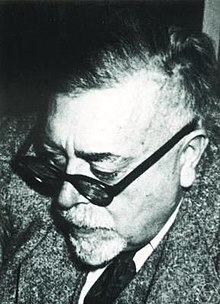

The image has been saved to 'wiki_images/Norbert_Wiener.jpg'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f655630cfe0>


The image has been saved to 'wiki_images/Warren_Weaver.jpg'
An error occurred: 'NoneType' object is not subscriptable
The image has been saved to 'wiki_images/W._Ross_Ashby.jpg'


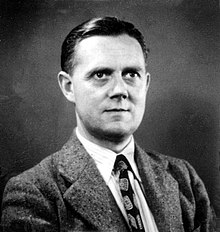

The image has been saved to 'wiki_images/W._Ross_Ashby.jpg'
The image has been saved to 'wiki_images/John_von_Neumann.gif'


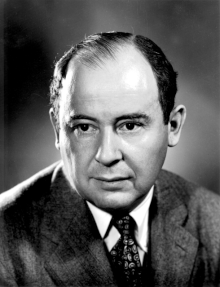

The image has been saved to 'wiki_images/John_von_Neumann.gif'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f6556759e90>


The image has been saved to 'wiki_images/Gregory_Bateson.jpg'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f65564d9cb0>


The image has been saved to 'wiki_images/Heinz_von_Foerster.jpg'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f655688f560>


The image has been saved to 'wiki_images/Hsue-Shen_Tsien.jpg'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f65564d9cb0>


The image has been saved to 'wiki_images/Claude_Shannon.jpg'
An error occurred: 'NoneType' object has no attribute 'find'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f65565749a0>


The image has been saved to 'wiki_images/Russell_Ackoff.jpg'
The image has been saved to 'wiki_images/Stafford_Beer.png'


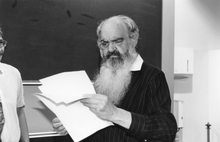

The image has been saved to 'wiki_images/Stafford_Beer.png'
The image has been saved to 'wiki_images/Gordon_Pask.gif'


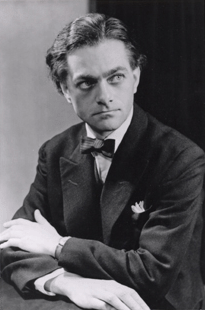

The image has been saved to 'wiki_images/Gordon_Pask.gif'
The content fetched was not a valid image: cannot identify image file <_io.BytesIO object at 0x7f6555c0b600>


The image has been saved to 'wiki_images/Humberto_Maturana.jpg'


In [19]:
for name in names:
    fetch_and_save_wiki_image(name)

In [20]:
import requests

def download_and_save_images():
    cybernetician_images = {
        "claude_shannon": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Claude_Shannon.jpg",
        "gregory_bateson": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Gregory_Bateson.jpg",
        "heinz_von_foerster": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Heinz_von_Foerster.jpg",
        "hsue_shen_tsien": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Hsue-Shen_Tsien.jpg",
        "humberto_maturana": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Humberto_Maturana.jpg",
        "russell_ackoff": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Russell_Ackoff.jpg",
        "walter_cannon": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Walter_Cannon.jpg",
        "warren_weaver": "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Warren_Weaver.jpg",
    }

    urls = {
        "claude_shannon": "https://upload.wikimedia.org/wikipedia/commons/9/99/ClaudeShannon_MFO3807.jpg",
        "gregory_bateson": "https://sustainabletompkins.org/wp-content/uploads/Gregory-Bateson-outdoors.jpg",
        "heinz_von_foerster": "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/HvF_01.jpg/1200px-HvF_01.jpg",
        "hsue_shen_tsien": "https://divisions-prod.s3.amazonaws.com/galcit/images/Tsien.width-1600.jpg",
        "humberto_maturana": "https://theecologist.org/sites/default/files/2021-05/humberto_maturana2.jpg",
        "russell_ackoff": "https://squiretothegiants.files.wordpress.com/2015/06/ackoff.gif",
        "walter_cannon": "https://meded.hms.harvard.edu/sites/hwpi.harvard.edu/files/styles/os_files_xxlarge/public/hms-med-ed/files/walter_bradford_cannon_portrait.jpg",
        "warren_weaver": "https://historyofinformation.com/images/Screen_Shot_2020-08-31_at_7.13.39_PM.png",
    }

    for key in cybernetician_images:
        response = requests.get(urls[key])
        with open(cybernetician_images[key], 'wb') as f:
            f.write(response.content)
        print(f"The image has been saved to '{cybernetician_images[key]}'")

download_and_save_images()


The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Claude_Shannon.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Gregory_Bateson.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Heinz_von_Foerster.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Hsue-Shen_Tsien.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Humberto_Maturana.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Russell_Ackoff.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Walter_Cannon.jpg'
The image has been saved to '/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/Warren_Weaver.jpg'


Gregory_Bateson.jpg


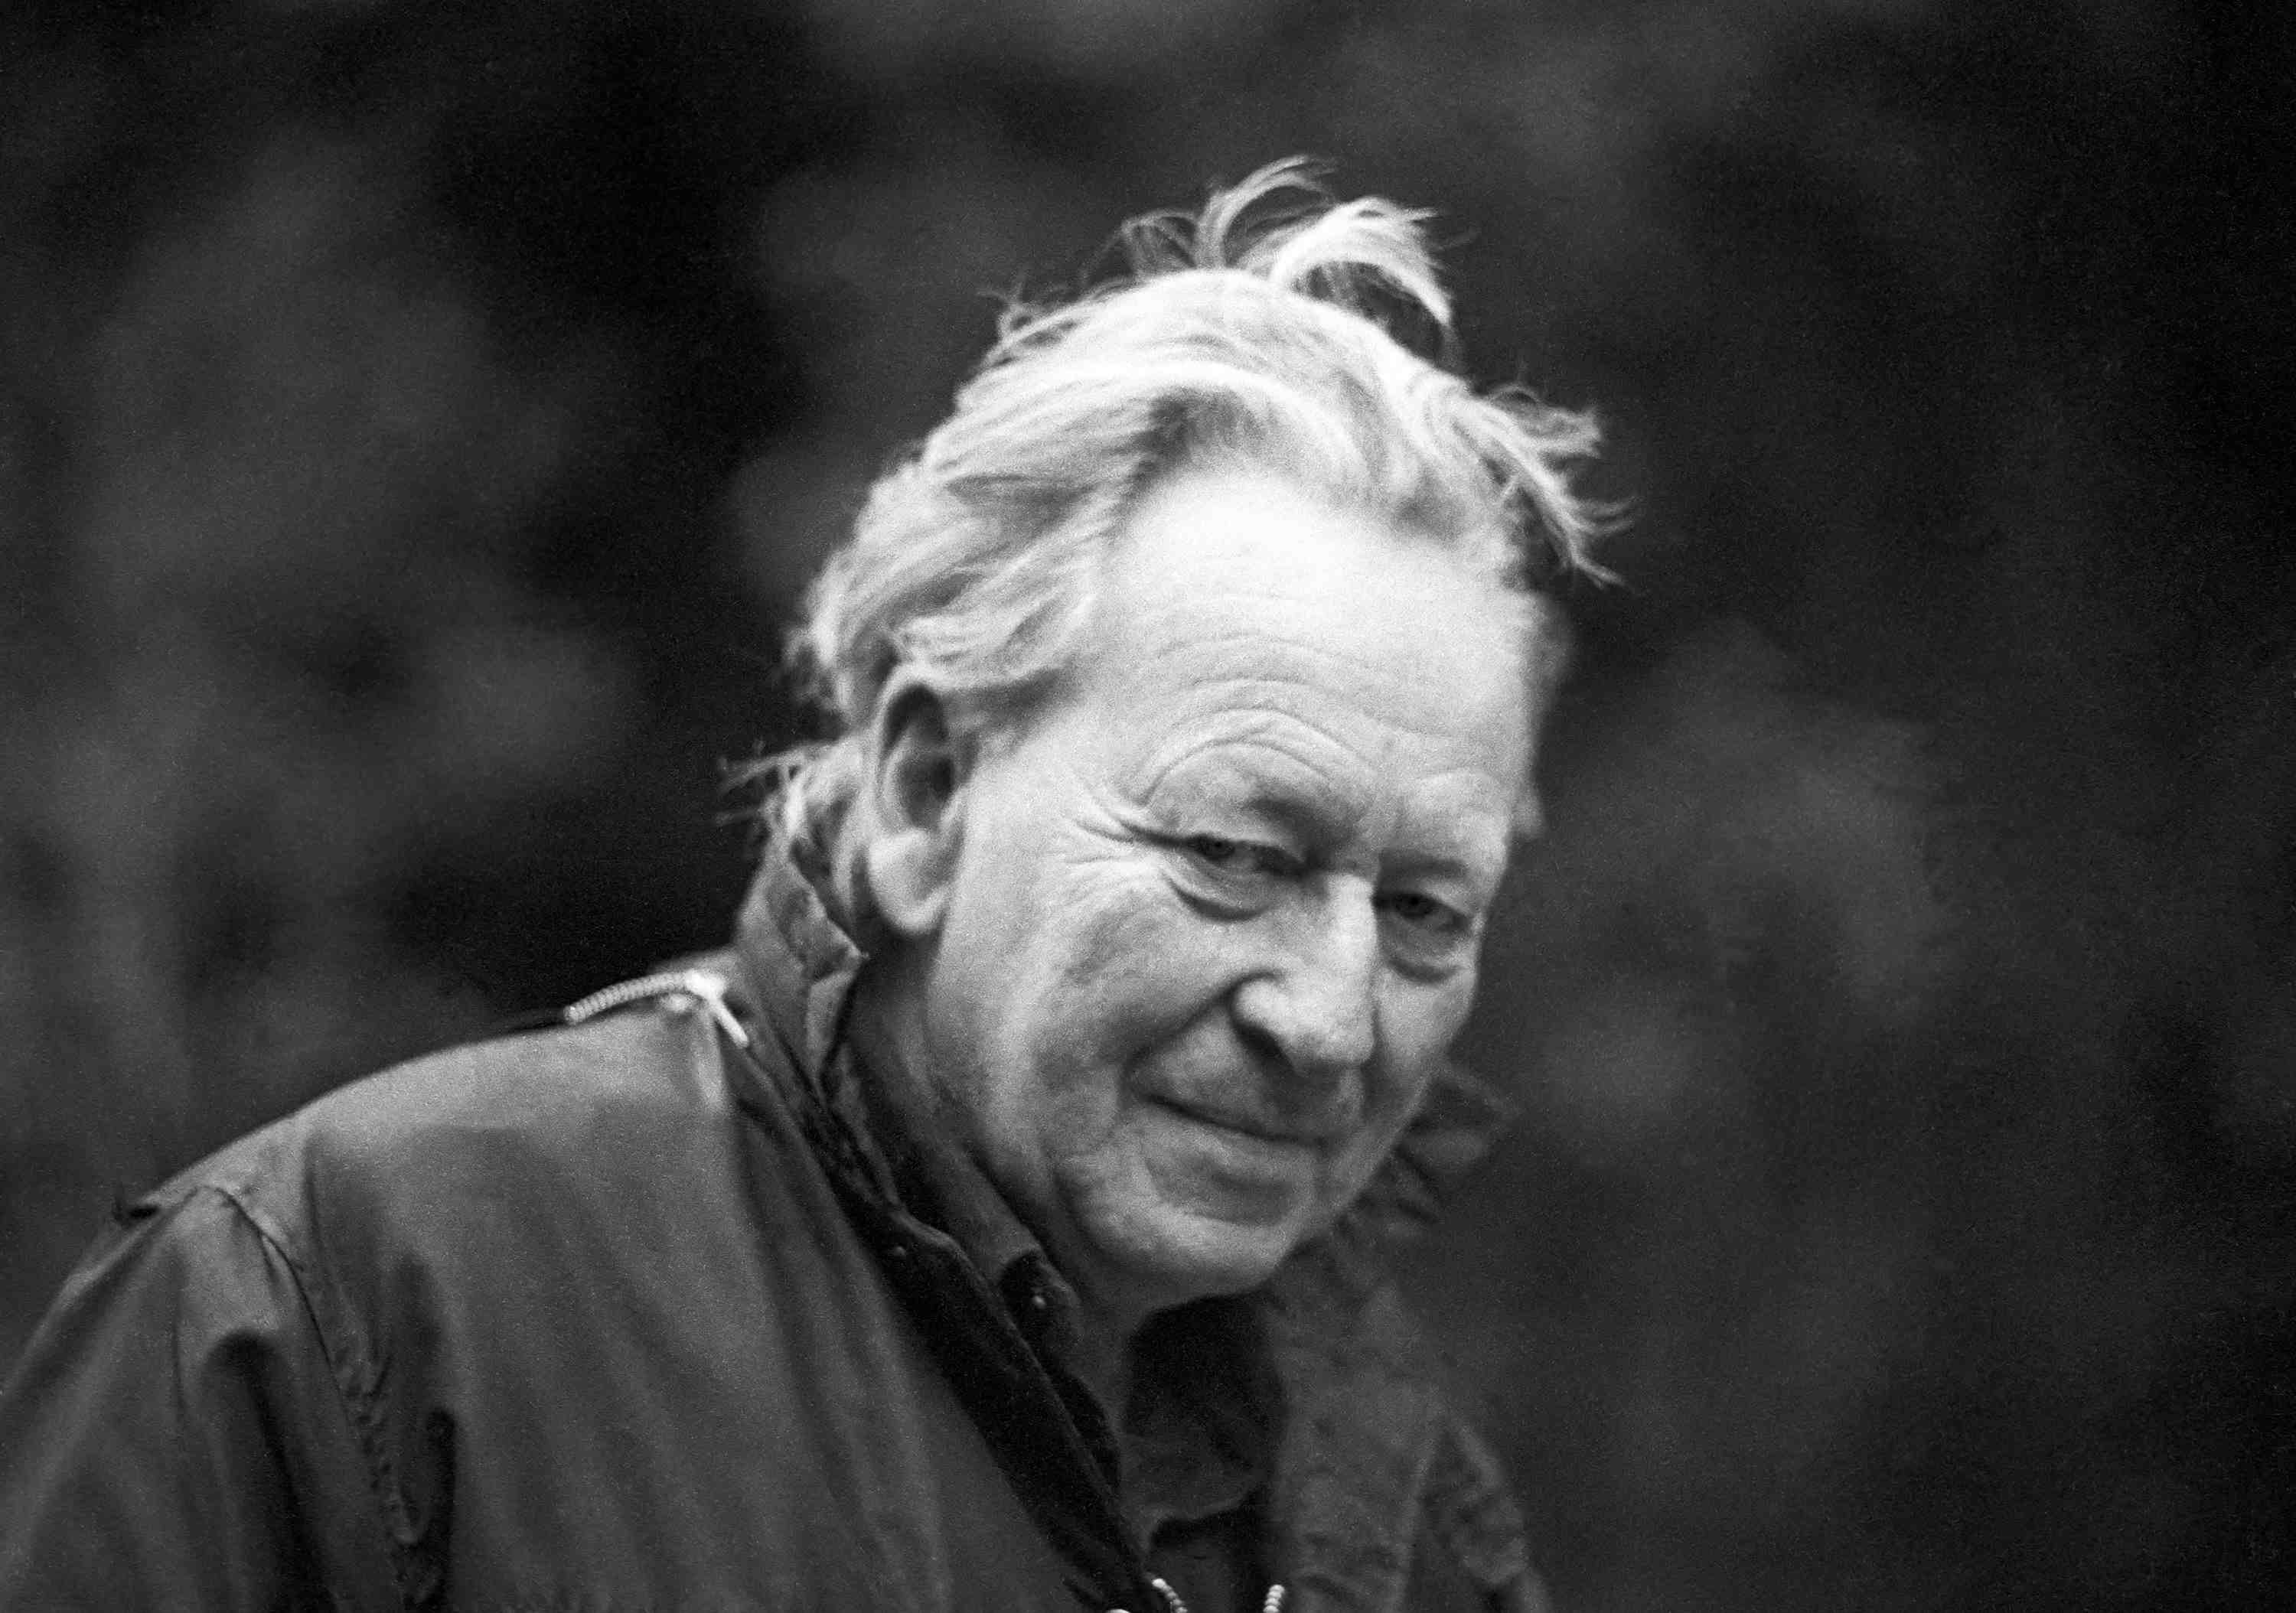

W_Ross_Ashby.jpg


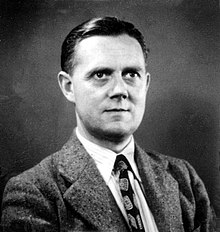

John_von_Neumann.gif


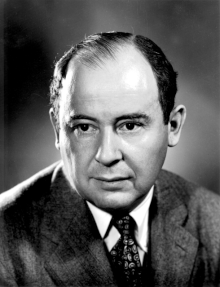

Humberto_Maturana.jpg


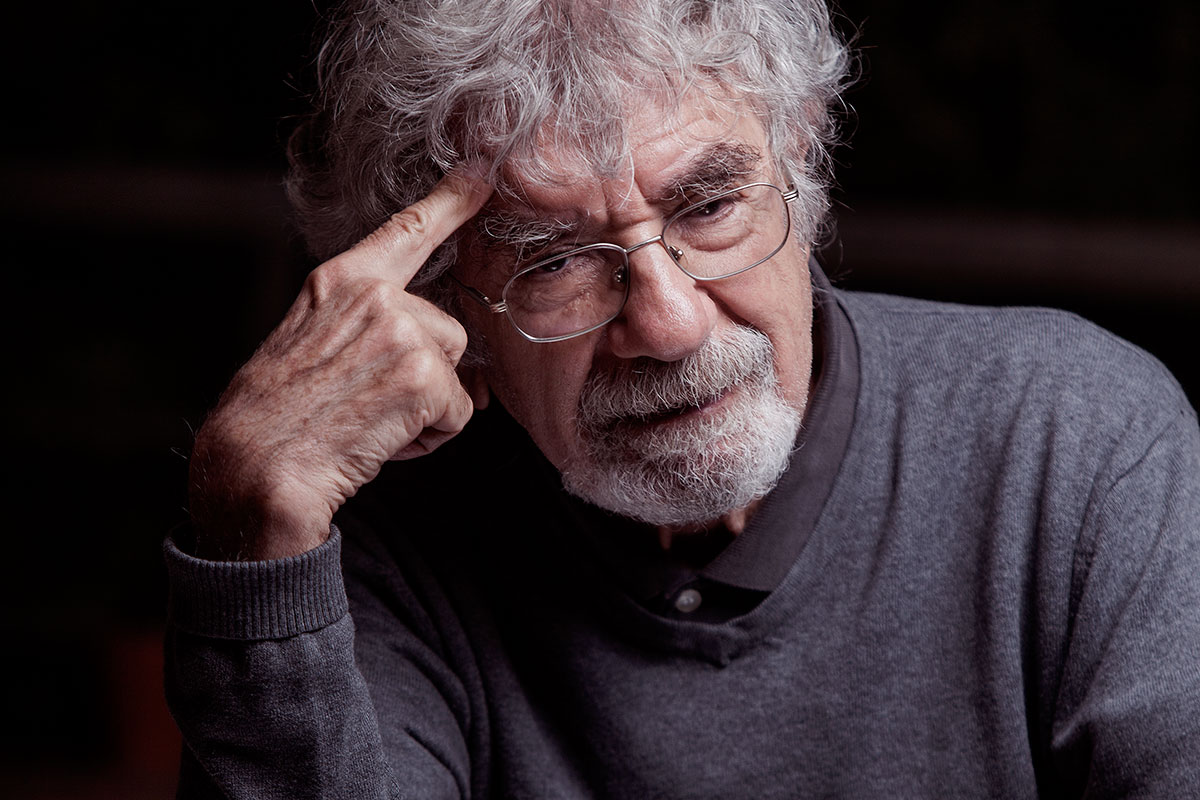

Warren_Weaver.jpg


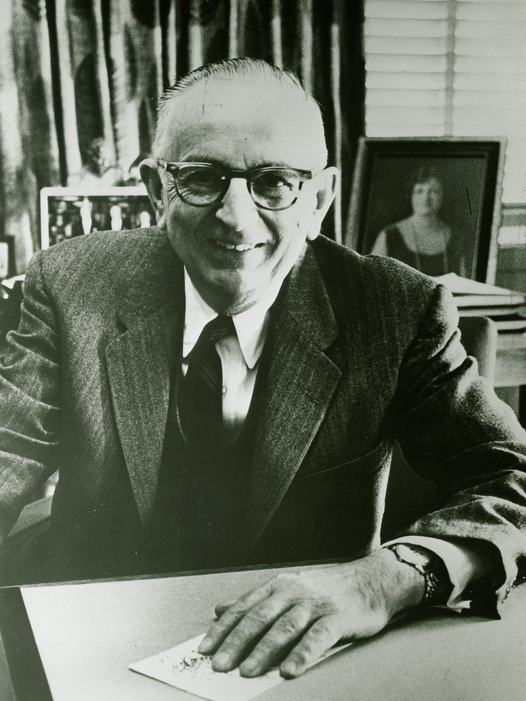

Walter_Cannon.jpg


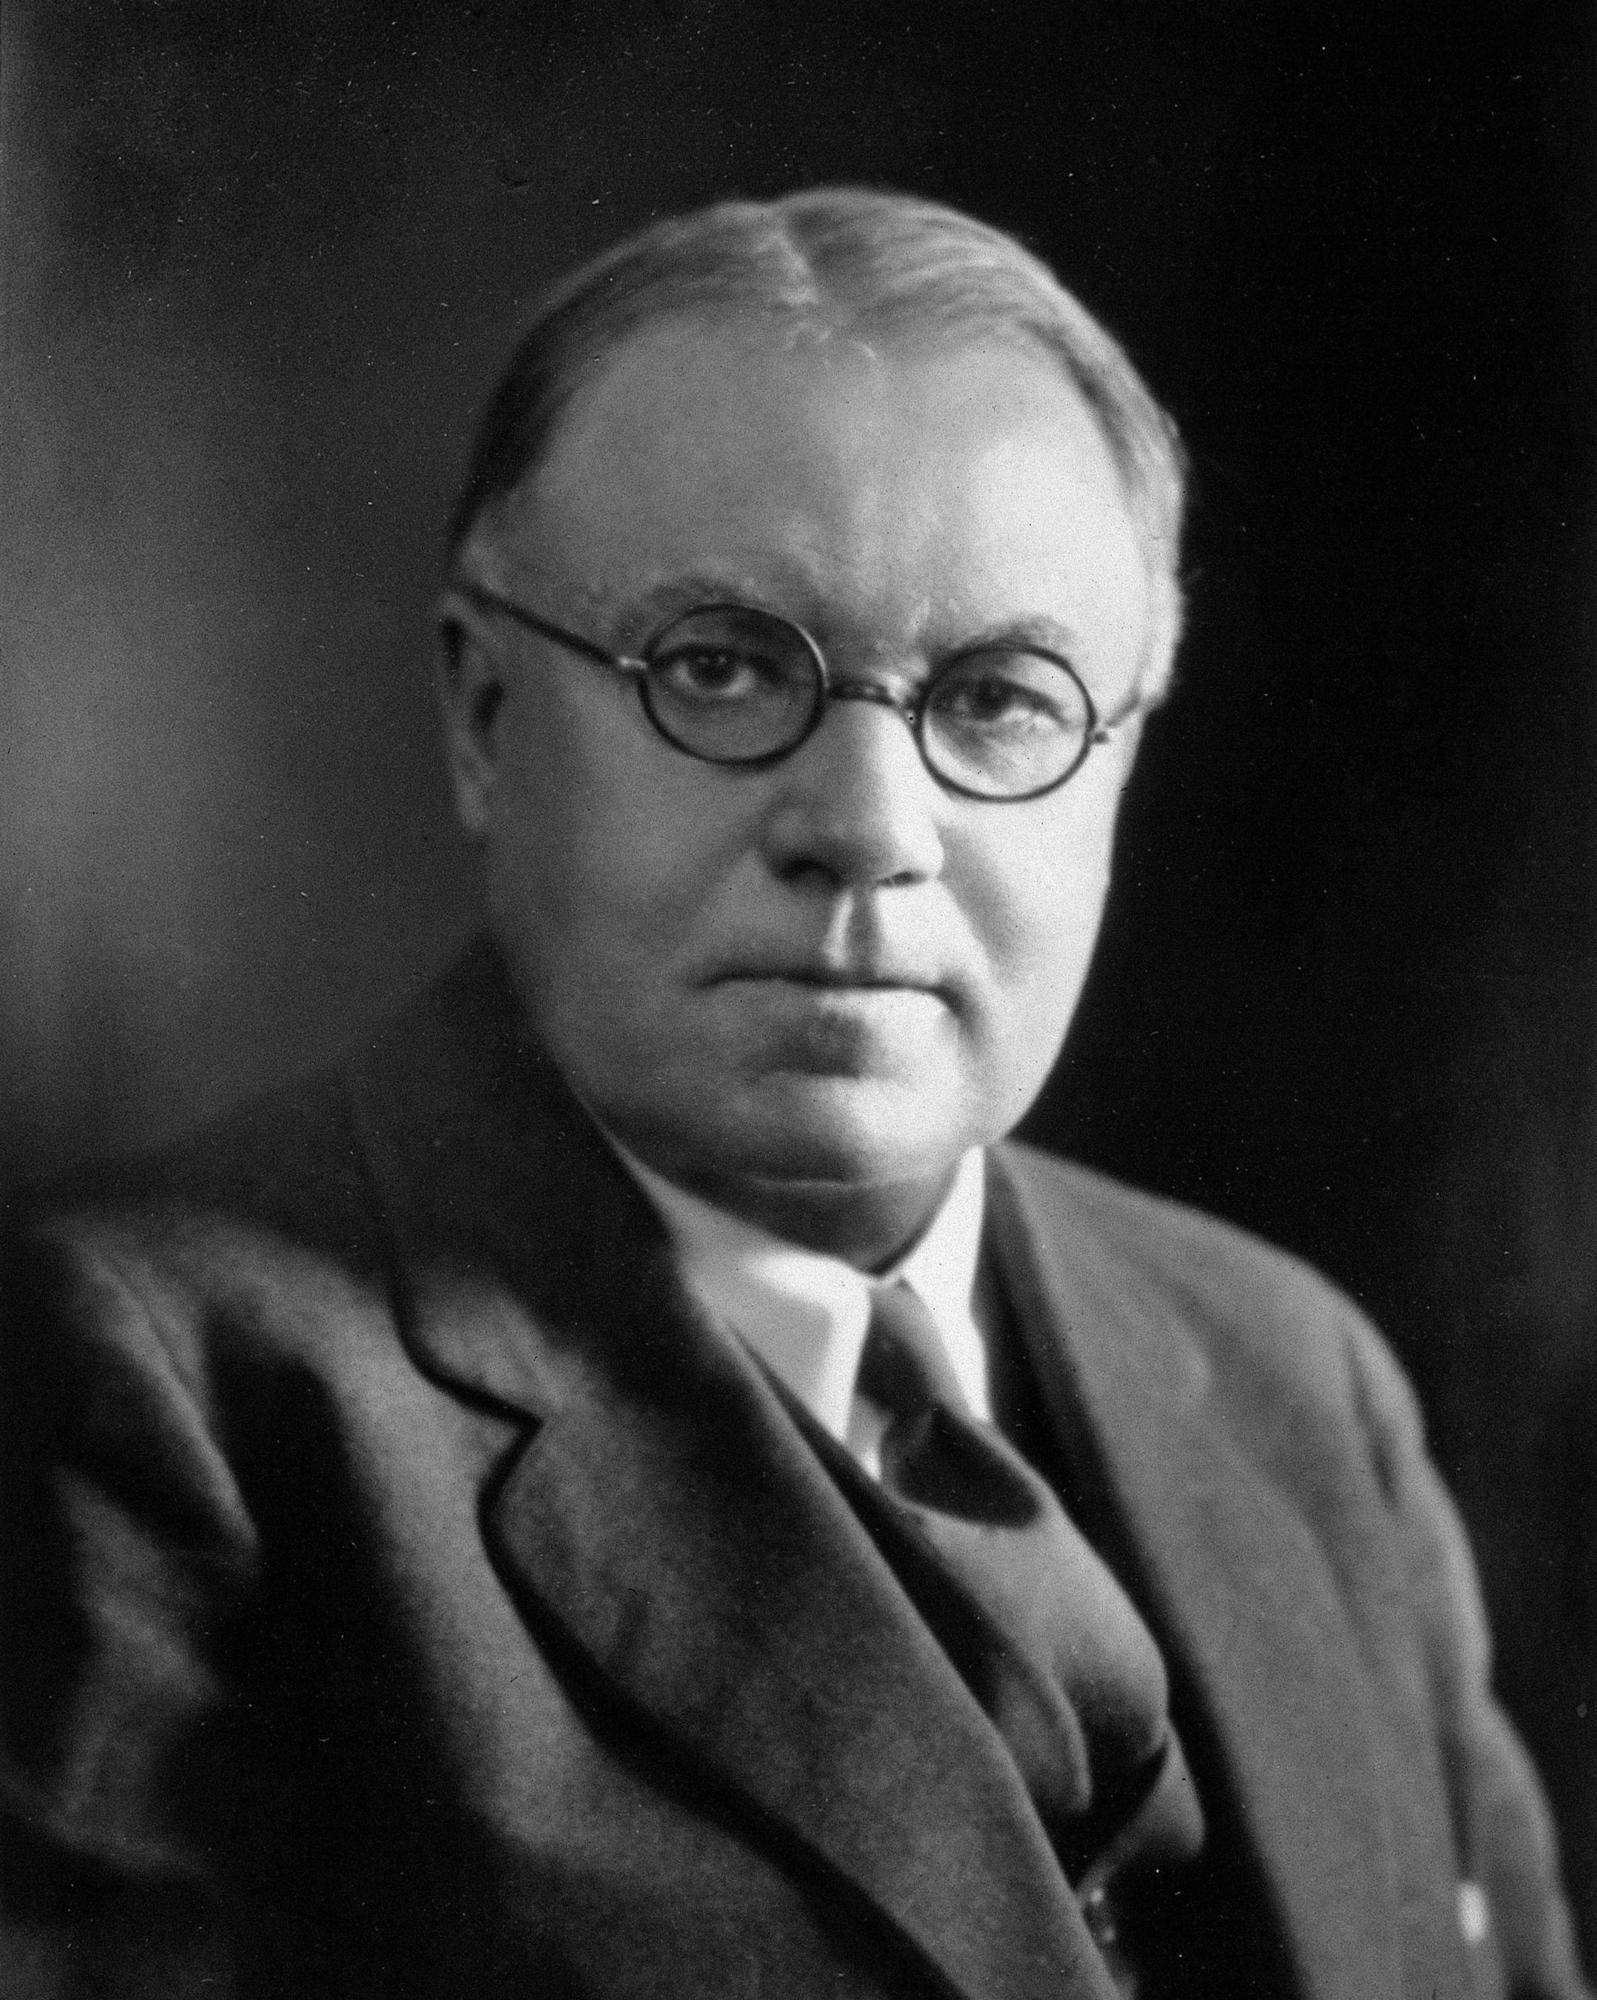

Stafford_Beer.png


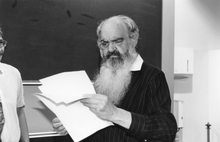

Claude_Shannon.jpg


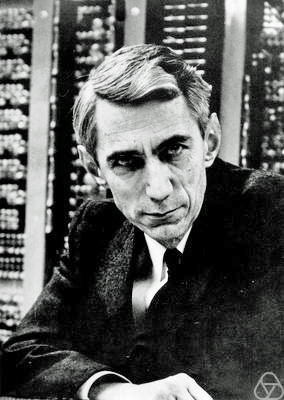

Russell_Ackoff.jpg


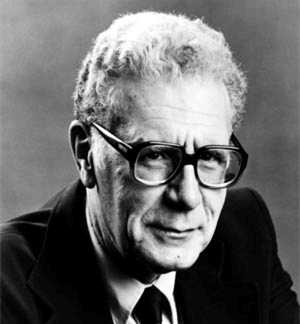

Gordon_Pask.gif


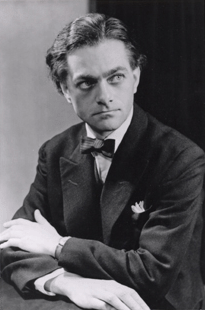

Heinz_von_Foerster.jpg


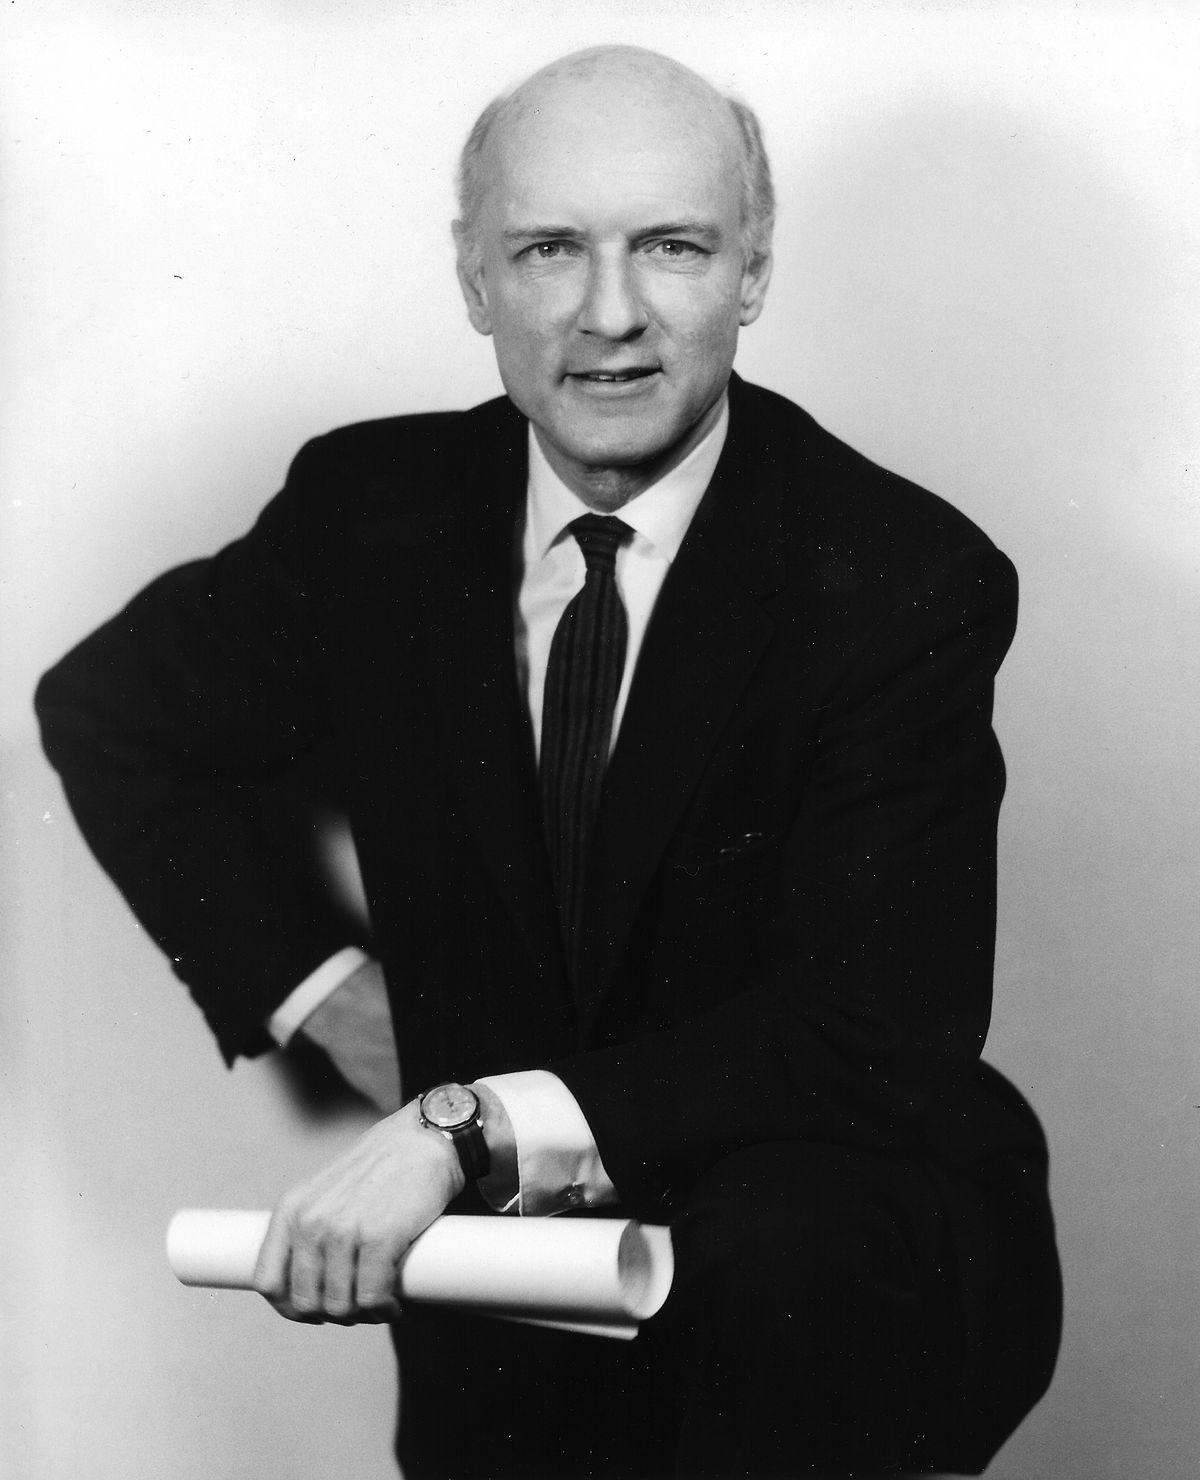

Ernst_von_Glasersfeld.jpg


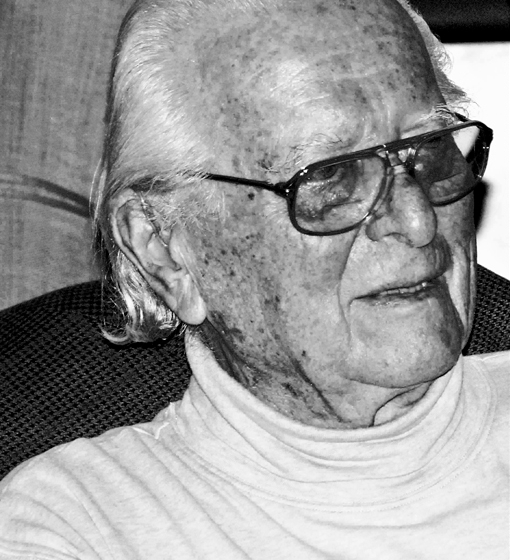

Norbert_Wiener.jpg


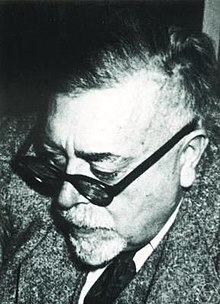

Hsue-Shen_Tsien.jpg


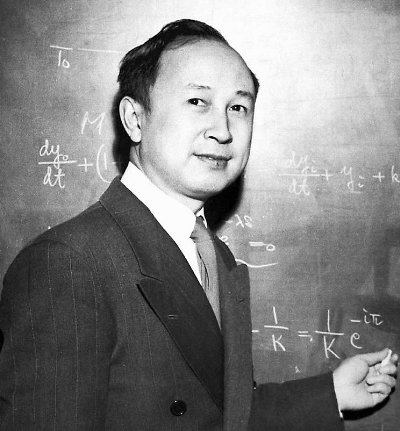

Warren_S_McCulloch.png


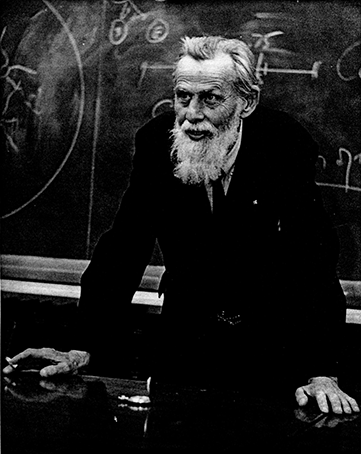

In [21]:
from IPython.display import Image
from IPython.display import display
import os

# Specify the path to your images
path = "/home/valdegg/Documents/ai_projects/cyb_gpt/wiki_images/"

# List all files in the directory
files = os.listdir(path)

# Display each image
for file_name in files:
    print(file_name)
    display(Image(filename=os.path.join(path, file_name)))
